In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [122]:
df = pd.read_csv("swiggy.csv")

In [123]:
df

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63
...,...,...,...,...,...,...,...,...,...,...
8675,464626,Panjarapole Cross Road,Ahmedabad,Malt Pizza,500.0,2.9,80,Pizzas,Navrangpura,40
8676,465835,Rohini,Delhi,Jay Mata Ji Home Kitchen,200.0,2.9,80,South Indian,Rohini,28
8677,465872,Rohini,Delhi,Chinese Kitchen King,150.0,2.9,80,"Chinese,Snacks,Tandoor",Rohini,58
8678,465990,Rohini,Delhi,Shree Ram Paratha Wala,150.0,2.9,80,"North Indian,Indian,Snacks",Rohini,28


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.3+ KB


In [125]:
df.isnull().sum()

,0
ID,0
Area,0
City,0
Restaurant,0
Price,0
Avg ratings,0
Total ratings,0
Food type,0
Address,0
Delivery time,0


**as we can see there are no null and duplicate values**

In [126]:
df.duplicated().sum()

0

In [127]:
df.drop(columns = ["ID","Address","Area"],inplace = True)

**we have dropped the columns which were not required**

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   City           8680 non-null   object 
 1   Restaurant     8680 non-null   object 
 2   Price          8680 non-null   float64
 3   Avg ratings    8680 non-null   float64
 4   Total ratings  8680 non-null   int64  
 5   Food type      8680 non-null   object 
 6   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 474.8+ KB


In [129]:
df["City"].unique()

array(['Bangalore', 'Hyderabad', 'Mumbai', 'Pune', 'Kolkata', 'Delhi',
       'Chennai', 'Ahmedabad', 'Surat'], dtype=object)

In [130]:
city = [['Bangalore', 'Hyderabad', 'Mumbai', 'Pune', 'Kolkata', 'Delhi',
       'Chennai', 'Ahmedabad', 'Surat']]

**Now we will encode the City column **





In [131]:
from sklearn.preprocessing import OrdinalEncoder

In [132]:
encoder = OrdinalEncoder(categories=city)

In [133]:
encoder.fit_transform(df[["City"]])

array([[0.],
       [0.],
       [0.],
       ...,
       [5.],
       [5.],
       [7.]])

In [134]:
df["City"] = encoder.fit_transform(df[["City"]])

In [135]:
df

,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Delivery time
0,0.0,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",59
1,0.0,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",56
2,0.0,Kim Lee,650.0,4.4,100,Chinese,50
3,0.0,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",57
4,0.0,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",63
...,...,...,...,...,...,...,...
8675,7.0,Malt Pizza,500.0,2.9,80,Pizzas,40
8676,5.0,Jay Mata Ji Home Kitchen,200.0,2.9,80,South Indian,28
8677,5.0,Chinese Kitchen King,150.0,2.9,80,"Chinese,Snacks,Tandoor",58
8678,5.0,Shree Ram Paratha Wala,150.0,2.9,80,"North Indian,Indian,Snacks",28


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   City           8680 non-null   float64
 1   Restaurant     8680 non-null   object 
 2   Price          8680 non-null   float64
 3   Avg ratings    8680 non-null   float64
 4   Total ratings  8680 non-null   int64  
 5   Food type      8680 non-null   object 
 6   Delivery time  8680 non-null   int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 474.8+ KB


**Now we will change datatype of City column as int**

In [137]:
df["City"] = df["City"].astype("int")

**Now perform encoding on the Food Type Column**

In [138]:
p = df["Food type"].str.strip().str.split(",")

In [139]:
p.value_counts()

,count
Food type,
[Indian],389
[Chinese],277
[North Indian],246
[Fast Food],240
[South Indian],228
...,...
"[Andhra, South Indian, North Indian, Biryani]",1
[Healthy Food Juices Continental],1
[Bengali Indian Combo],1


In [140]:
t = []
for i in p:
    for j in i:
        t.append(j)

In [141]:
k =pd.DataFrame(t)

In [142]:
k

,0
0,Biryani
1,Chinese
2,North Indian
3,South Indian
4,Mughlai
...,...
23618,Indian
23619,Snacks
23620,Chaat
23621,Snacks


**here we will consider the top 10 categories of Food Type for analysis**

In [143]:
k.value_counts().head(10).reset_index()

,0,count
0,Chinese,2588
1,North Indian,1921
2,Indian,1772
3,Fast Food,1550
4,Beverages,1524
5,Desserts,1436
6,Biryani,1079
7,Snacks,1013
8,South Indian,857
9,Continental,686


In [144]:
food_type = k.value_counts().head(10).reset_index()

In [145]:
for i in food_type[0]:
    df[i]=df["Food type"].apply(lambda x: "1" if i in x else np.nan)

In [146]:
df

,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Delivery time,Chinese,North Indian,Indian,Fast Food,Beverages,Desserts,Biryani,Snacks,South Indian,Continental
0,0,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",59,1,1,1,NaN,NaN,NaN,1,NaN,1,NaN
1,0,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,Kim Lee,650.0,4.4,100,Chinese,50,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",57,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",63,NaN,1,1,NaN,1,1,NaN,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8675,7,Malt Pizza,500.0,2.9,80,Pizzas,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8676,5,Jay Mata Ji Home Kitchen,200.0,2.9,80,South Indian,28,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN
8677,5,Chinese Kitchen King,150.0,2.9,80,"Chinese,Snacks,Tandoor",58,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
8678,5,Shree Ram Paratha Wala,150.0,2.9,80,"North Indian,Indian,Snacks",28,NaN,1,1,NaN,NaN,NaN,NaN,1,NaN,NaN


In [147]:
newdf = df.iloc[:,7:]

In [148]:
newdf

,Chinese,North Indian,Indian,Fast Food,Beverages,Desserts,Biryani,Snacks,South Indian,Continental
0,1,1,1,NaN,NaN,NaN,1,NaN,1,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1,1,NaN,1,1,NaN,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
8675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8676,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN
8677,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
8678,NaN,1,1,NaN,NaN,NaN,NaN,1,NaN,NaN


In [149]:
ind = (newdf.notna().any(axis=1))

In [150]:
df["value"] = ind

In [151]:
df

,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Delivery time,Chinese,North Indian,Indian,Fast Food,Beverages,Desserts,Biryani,Snacks,South Indian,Continental,value
0,0,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",59,1,1,1,NaN,NaN,NaN,1,NaN,1,NaN,True
1,0,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,0,Kim Lee,650.0,4.4,100,Chinese,50,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,0,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",57,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,0,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",63,NaN,1,1,NaN,1,1,NaN,1,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8675,7,Malt Pizza,500.0,2.9,80,Pizzas,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
8676,5,Jay Mata Ji Home Kitchen,200.0,2.9,80,South Indian,28,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN,True
8677,5,Chinese Kitchen King,150.0,2.9,80,"Chinese,Snacks,Tandoor",58,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,True
8678,5,Shree Ram Paratha Wala,150.0,2.9,80,"North Indian,Indian,Snacks",28,NaN,1,1,NaN,NaN,NaN,NaN,1,NaN,NaN,True


In [152]:
tempdf = df[df["value"]==False].reset_index()

In [153]:
tempdf

,index,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Delivery time,Chinese,North Indian,Indian,Fast Food,Beverages,Desserts,Biryani,Snacks,South Indian,Continental,value
0,1,0,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,9,0,Bangaliana,300.0,4.0,500,Bengali,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,16,0,Kerala Pavilion,300.0,4.1,100,"Kerala,Seafood",55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,20,0,Esplanade,1200.0,4.3,100,"Mughlai,Bengali",54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,28,1,Chef Inam'S Steak House,1200.0,4.2,100,"Steakhouse,American",69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
812,8605,4,Sutripti Mistanna Bhander,100.0,2.9,80,Sweets,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
813,8647,0,Sri Ramji Sweets,75.0,2.9,80,Sweets,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
814,8669,0,Bangarpet Chats,110.0,2.9,80,Chaat,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
815,8670,5,Zaika The Bakers,400.0,2.9,80,Pizzas,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [154]:
drop_index = tempdf["index"]

In [155]:
df.drop(index=drop_index,inplace = True)

In [156]:
df = df.reset_index()

In [157]:
df

,index,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Delivery time,Chinese,North Indian,Indian,Fast Food,Beverages,Desserts,Biryani,Snacks,South Indian,Continental,value
0,0,0,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",59,1,1,1,NaN,NaN,NaN,1,NaN,1,NaN,True
1,2,0,Kim Lee,650.0,4.4,100,Chinese,50,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,3,0,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",57,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,4,0,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",63,NaN,1,1,NaN,1,1,NaN,1,NaN,NaN,True
4,5,0,Treat,800.0,4.5,100,"Mughlai,North Indian",56,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7858,8674,8,Panditjis Dilliwale Chhole Bhature & Dilli Chat,250.0,2.9,80,"North Indian,Chaat,Snacks",44,NaN,1,1,NaN,NaN,NaN,NaN,1,NaN,NaN,True
7859,8676,5,Jay Mata Ji Home Kitchen,200.0,2.9,80,South Indian,28,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN,True
7860,8677,5,Chinese Kitchen King,150.0,2.9,80,"Chinese,Snacks,Tandoor",58,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,True
7861,8678,5,Shree Ram Paratha Wala,150.0,2.9,80,"North Indian,Indian,Snacks",28,NaN,1,1,NaN,NaN,NaN,NaN,1,NaN,NaN,True


**Now after encoding we will drop the unwanted columns**

In [158]:
df.drop(columns = ["Food type","value","index"],inplace = True)

In [159]:
df

,City,Restaurant,Price,Avg ratings,Total ratings,Delivery time,Chinese,North Indian,Indian,Fast Food,Beverages,Desserts,Biryani,Snacks,South Indian,Continental
0,0,Tandoor Hut,300.0,4.4,100,59,1,1,1,NaN,NaN,NaN,1,NaN,1,NaN
1,0,Kim Lee,650.0,4.4,100,50,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,New Punjabi Hotel,250.0,3.9,500,57,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,Nh8,350.0,4.0,50,63,NaN,1,1,NaN,1,1,NaN,1,NaN,NaN
4,0,Treat,800.0,4.5,100,56,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7858,8,Panditjis Dilliwale Chhole Bhature & Dilli Chat,250.0,2.9,80,44,NaN,1,1,NaN,NaN,NaN,NaN,1,NaN,NaN
7859,5,Jay Mata Ji Home Kitchen,200.0,2.9,80,28,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN
7860,5,Chinese Kitchen King,150.0,2.9,80,58,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
7861,5,Shree Ram Paratha Wala,150.0,2.9,80,28,NaN,1,1,NaN,NaN,NaN,NaN,1,NaN,NaN


In [160]:
df.describe()

,City,Price,Avg ratings,Total ratings,Delivery time
count,7863.000000,7863.000000,7863.000000,7863.000000,7863.000000
mean,3.599008,343.753148,3.653631,160.911866,53.925219
std,2.385316,220.328883,0.645649,407.104855,14.263555
min,0.000000,0.000000,2.000000,20.000000,20.000000
25%,2.000000,200.000000,2.900000,50.000000,44.000000
50%,3.000000,300.000000,3.900000,80.000000,52.000000
75%,6.000000,400.000000,4.200000,100.000000,63.000000
max,8.000000,2500.000000,5.000000,10000.000000,109.000000


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7863 entries, 0 to 7862
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   City           7863 non-null   int64  
 1   Restaurant     7863 non-null   object 
 2   Price          7863 non-null   float64
 3   Avg ratings    7863 non-null   float64
 4   Total ratings  7863 non-null   int64  
 5   Delivery time  7863 non-null   int64  
 6   Chinese        2816 non-null   object 
 7   North Indian   2077 non-null   object 
 8   Indian         4153 non-null   object 
 9   Fast Food      1694 non-null   object 
 10  Beverages      1693 non-null   object 
 11  Desserts       1637 non-null   object 
 12  Biryani        1160 non-null   object 
 13  Snacks         1144 non-null   object 
 14  South Indian   928 non-null    object 
 15  Continental    751 non-null    object 
dtypes: float64(2), int64(3), object(11)
memory usage: 983.0+ KB


**Filling NULL values to 0**

In [162]:
df.fillna(0, inplace=True)

In [163]:
df

,City,Restaurant,Price,Avg ratings,Total ratings,Delivery time,Chinese,North Indian,Indian,Fast Food,Beverages,Desserts,Biryani,Snacks,South Indian,Continental
0,0,Tandoor Hut,300.0,4.4,100,59,1,1,1,0,0,0,1,0,1,0
1,0,Kim Lee,650.0,4.4,100,50,1,0,0,0,0,0,0,0,0,0
2,0,New Punjabi Hotel,250.0,3.9,500,57,1,1,1,0,0,0,0,0,0,0
3,0,Nh8,350.0,4.0,50,63,0,1,1,0,1,1,0,1,0,0
4,0,Treat,800.0,4.5,100,56,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7858,8,Panditjis Dilliwale Chhole Bhature & Dilli Chat,250.0,2.9,80,44,0,1,1,0,0,0,0,1,0,0
7859,5,Jay Mata Ji Home Kitchen,200.0,2.9,80,28,0,0,1,0,0,0,0,0,1,0
7860,5,Chinese Kitchen King,150.0,2.9,80,58,1,0,0,0,0,0,0,1,0,0
7861,5,Shree Ram Paratha Wala,150.0,2.9,80,28,0,1,1,0,0,0,0,1,0,0


**Changing Data Type to int**

In [169]:
df[["Chinese",	"North Indian","Indian",	"Fast Food",	"Beverages",	"Desserts",	"Biryani",	"Snacks","South Indian"	,"Continental"]]=df[["Chinese",	"North Indian","Indian",	"Fast Food",	"Beverages",	"Desserts",	"Biryani",	"Snacks","South Indian"	,"Continental"]].astype("int")

In [171]:
df.describe()

,City,Price,Avg ratings,Total ratings,Delivery time,Chinese,North Indian,Indian,Fast Food,Beverages,Desserts,Biryani,Snacks,South Indian,Continental
count,7863.000000,7863.000000,7863.000000,7863.000000,7863.000000,7863.000000,7863.000000,7863.000000,7863.000000,7863.000000,7863.000000,7863.000000,7863.000000,7863.000000,7863.000000
mean,3.599008,343.753148,3.653631,160.911866,53.925219,0.358133,0.264149,0.528170,0.215439,0.215312,0.208190,0.147526,0.145492,0.118021,0.095511
std,2.385316,220.328883,0.645649,407.104855,14.263555,0.479482,0.440907,0.499238,0.411153,0.411065,0.406039,0.354652,0.352618,0.322654,0.293938
min,0.000000,0.000000,2.000000,20.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,200.000000,2.900000,50.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,300.000000,3.900000,80.000000,52.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,400.000000,4.200000,100.000000,63.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,2500.000000,5.000000,10000.000000,109.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Now save the cleaned dataset**

In [173]:
df.to_csv('swiggy_cleaned_data.csv', index=False)

## Data Visulaization

In [204]:
df1 = pd.read_csv("swiggy_cleaned_data.csv")

In [205]:
df1

,City,Restaurant,Price,Avg ratings,Total ratings,Delivery time,Chinese,North Indian,Indian,Fast Food,Beverages,Desserts,Biryani,Snacks,South Indian,Continental
0,0,Tandoor Hut,300.0,4.4,100,59,1,1,1,0,0,0,1,0,1,0
1,0,Kim Lee,650.0,4.4,100,50,1,0,0,0,0,0,0,0,0,0
2,0,New Punjabi Hotel,250.0,3.9,500,57,1,1,1,0,0,0,0,0,0,0
3,0,Nh8,350.0,4.0,50,63,0,1,1,0,1,1,0,1,0,0
4,0,Treat,800.0,4.5,100,56,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7858,8,Panditjis Dilliwale Chhole Bhature & Dilli Chat,250.0,2.9,80,44,0,1,1,0,0,0,0,1,0,0
7859,5,Jay Mata Ji Home Kitchen,200.0,2.9,80,28,0,0,1,0,0,0,0,0,1,0
7860,5,Chinese Kitchen King,150.0,2.9,80,58,1,0,0,0,0,0,0,1,0,0
7861,5,Shree Ram Paratha Wala,150.0,2.9,80,28,0,1,1,0,0,0,0,1,0,0


<ipython-input-261-975ba551cd07>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x= df1["City"],palette="muted")


Text(0.5, 1.0, 'City wise Distribution of Orders on Swiggy')

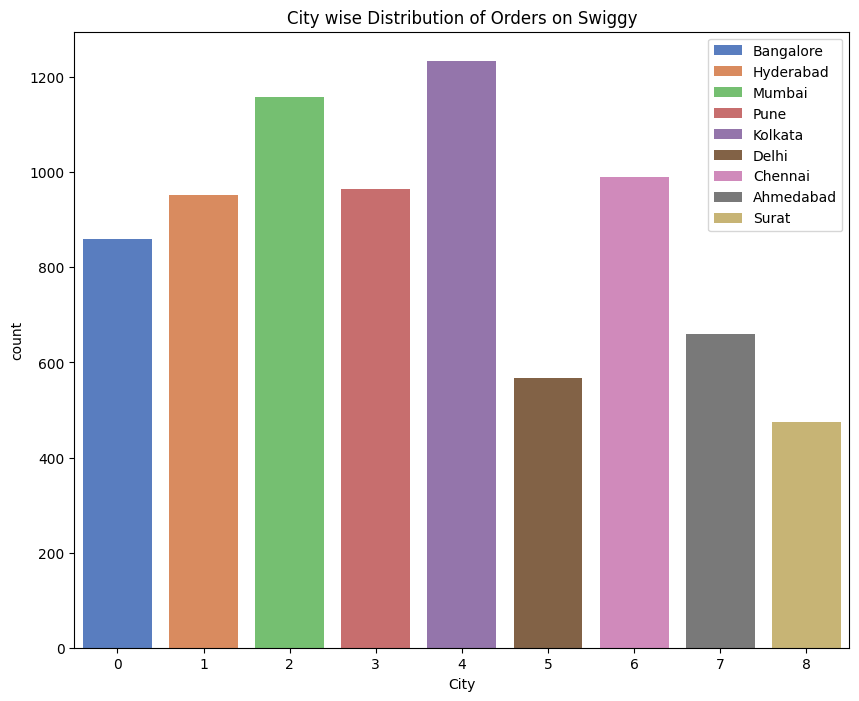

In [261]:
city = ['Bangalore', 'Hyderabad', 'Mumbai', 'Pune', 'Kolkata', 'Delhi',
       'Chennai', 'Ahmedabad', 'Surat']
plt.figure(figsize = (10,8))
sns.countplot(x= df1["City"],palette="muted")
plt.legend(city)
plt.title("City wise Distribution of Orders on Swiggy")

In [207]:
df1["Price"].groupby(df1["City"]).sum().reset_index()

,City,Price
0,0,320509.0
1,1,285959.0
2,2,439907.0
3,3,340183.0
4,4,447498.0
5,5,187347.0
6,6,345051.0
7,7,208049.0
8,8,128428.0


In [208]:
data = df1["Price"].groupby(df["City"]).sum().reset_index()

<ipython-input-267-1f20ac496d71>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="City",y="Price",data=data,palette="Set2")


Text(0.5, 1.0, 'City wise Total Price of Orders recieved on swiggy')

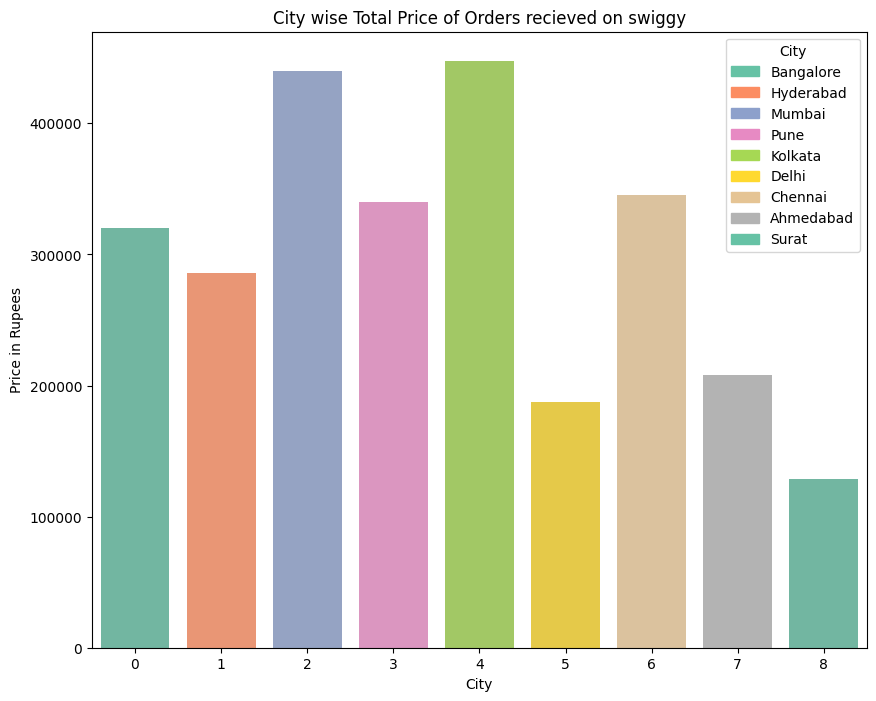

In [267]:
city = ['Bangalore', 'Hyderabad', 'Mumbai', 'Pune', 'Kolkata', 'Delhi','Chennai', 'Ahmedabad', 'Surat']
plt.figure(figsize = (10,8))
sns.barplot(x="City",y="Price",data=data,palette="Set2")
handles = [plt.Rectangle((0,0),1,1, color=color) for color in sns.color_palette("Set2", len(city))]
plt.legend(handles, city, title="City", loc="upper right")
plt.ylabel("Price in Rupees")
plt.title("City wise Total Price of Orders recieved on swiggy")

In [222]:
data1 = df1["Chinese"].groupby(df["City"]).sum().reset_index()

<ipython-input-268-2f9a24890b83>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="City",y="Chinese",data=data1,palette="Set2")


Text(0.5, 1.0, 'City wise Chinese restaurants registered on Swiggy')

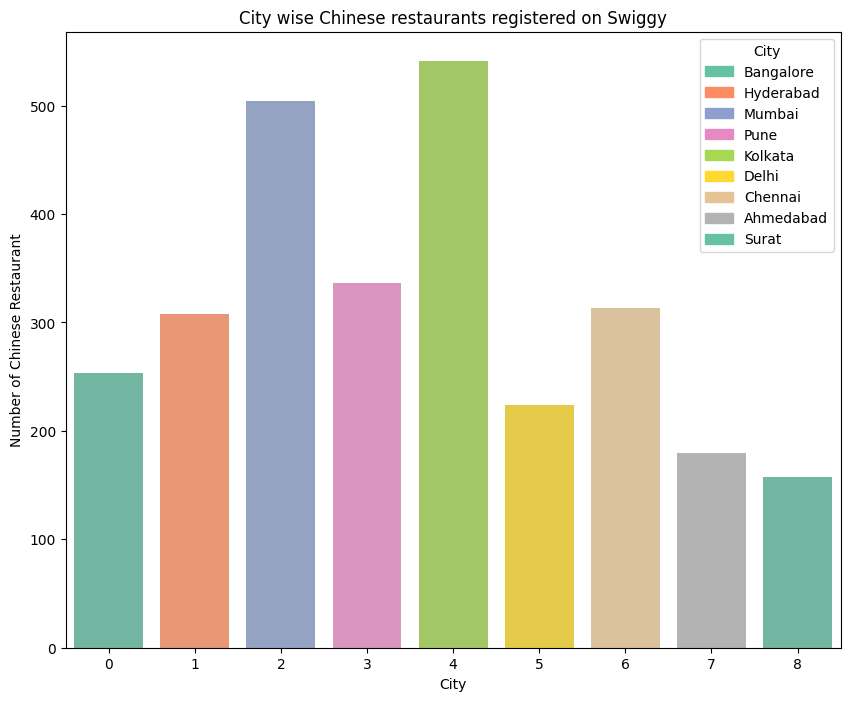

In [268]:
plt.figure(figsize = (10,8))
sns.barplot(x="City",y="Chinese",data=data1,palette="Set2")
handles = [plt.Rectangle((0,0),1,1, color=color) for color in sns.color_palette("Set2", len(city))]
plt.legend(handles, city, title="City", loc="upper right")
plt.ylabel("Number of Chinese Restaurant")
plt.title("City wise Chinese restaurants registered on Swiggy")

In [224]:
data2 = df1["North Indian"].groupby(df["City"]).sum().reset_index()

<ipython-input-269-e9606deeef9b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="City",y="North Indian",data=data2,palette="Set2")


Text(0.5, 1.0, 'City wise North Indian restaurants registered on Swiggy')

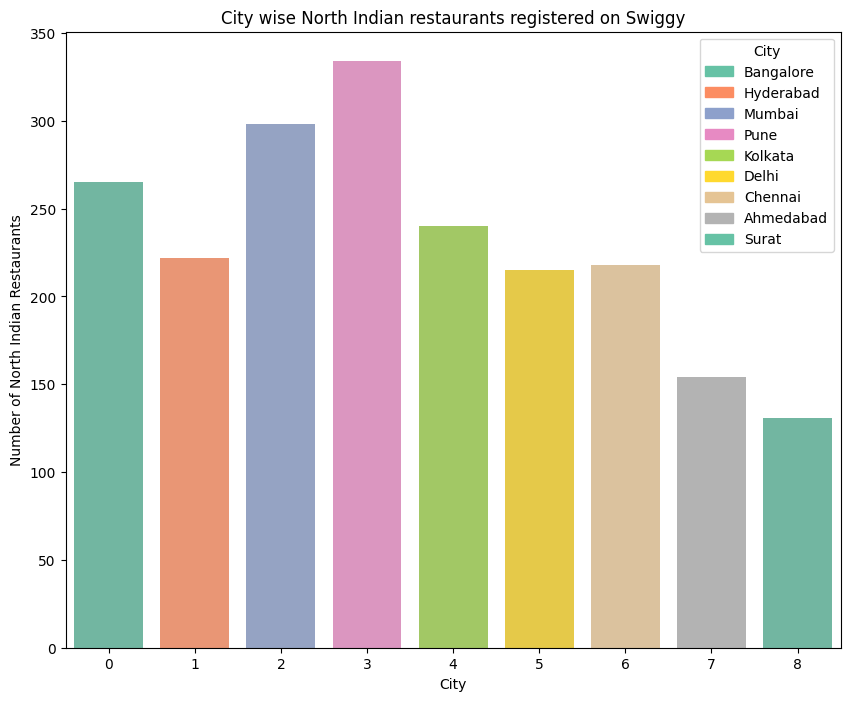

In [269]:
plt.figure(figsize = (10,8))
sns.barplot(x="City",y="North Indian",data=data2,palette="Set2")
handles = [plt.Rectangle((0,0),1,1, color=color) for color in sns.color_palette("Set2", len(city))]
plt.legend(handles, city, title="City", loc="upper right")
plt.ylabel("Number of North Indian Restaurants")
plt.title("City wise North Indian restaurants registered on Swiggy")

In [271]:
data3 = df1["Delivery time"].groupby(df["City"]).mean().reset_index()

<ipython-input-275-595df7399f82>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="City",y="Delivery time",data=data3,palette="Set2")


Text(0.5, 1.0, 'Average time taken to deliver an order city wise')

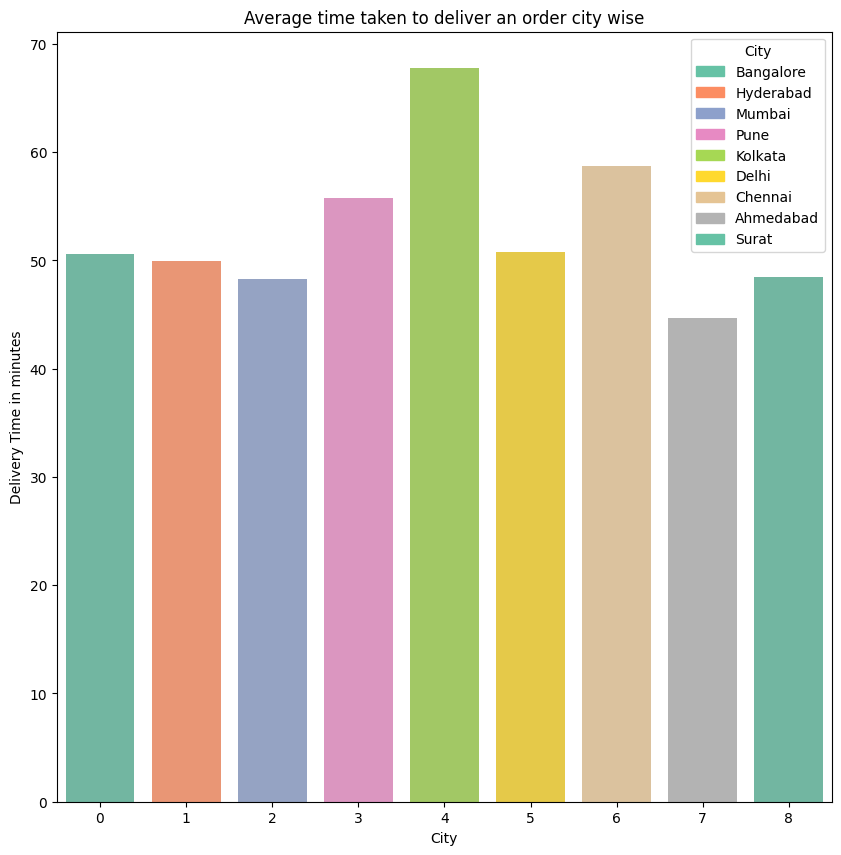

In [275]:
plt.figure(figsize = (10,10))
sns.barplot(x="City",y="Delivery time",data=data3,palette="Set2")
handles = [plt.Rectangle((0,0),1,1, color=color) for color in sns.color_palette("Set2", len(city))]
plt.legend(handles, city, title="City", loc="upper right")
plt.ylabel("Delivery Time in minutes")
plt.title("Average time taken to deliver an order city wise")

In [236]:
newdict = {}
new = df1.iloc[:,6:]
for i in new:
  newdict[i] = df1[i].sum()

In [238]:
newdict

{'Chinese': 2816,
 'North Indian': 2077,
 'Indian': 4153,
 'Fast Food': 1694,
 'Beverages': 1693,
 'Desserts': 1637,
 'Biryani': 1160,
 'Snacks': 1144,
 'South Indian': 928,
 'Continental': 751}

In [248]:
pd.DataFrame.from_dict(newdict, orient='index', columns=['Values'])

,Values
Chinese,2816
North Indian,2077
Indian,4153
Fast Food,1694
Beverages,1693
Desserts,1637
Biryani,1160
Snacks,1144
South Indian,928
Continental,751


In [249]:
restaurnt = pd.DataFrame.from_dict(newdict, orient='index', columns=['Values'])
restaurnt.index.name = 'Category'
print(restaurnt)

              Values
Category            
Chinese         2816
North Indian    2077
Indian          4153
Fast Food       1694
Beverages       1693
Desserts        1637
Biryani         1160
Snacks          1144
South Indian     928
Continental      751


<ipython-input-276-7c269f9c31db>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Category",y="Values",data=restaurnt,palette="Set2")


Text(0.5, 1.0, 'Number of Restaurnts in all categories')

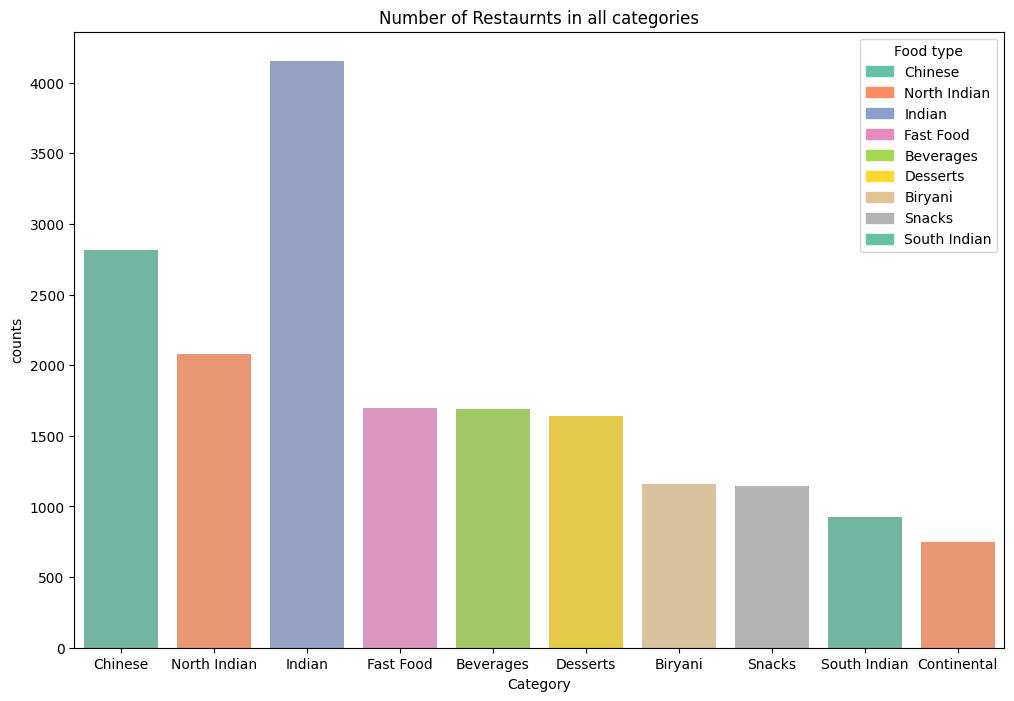

In [276]:
plt.figure(figsize = (12,8))
sns.barplot(x="Category",y="Values",data=restaurnt,palette="Set2")
handles = [plt.Rectangle((0,0),1,1, color=color) for color in sns.color_palette("Set2", len(city))]
plt.legend(handles, restaurnt.index, title="Food type", loc="upper right")
plt.ylabel("counts")
plt.title("Number of Restaurnts in all categories")